# **Лабораторная работа №6. Визуализация многомерных данных с использованием специализированной визуализации**

In [ ]:
!pip install ChernoffFace

In [ ]:
from ChernoffFace import *
import matplotlib.cm
import pylab as pl

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/bfeed.csv')

# data['high_education']=data['yschool'].map(lambda x: 0 if x < 13 else 1)

In [ ]:
data

,Unnamed: 0,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
0,1,16,1,1,0,0,1,24,82,14,0
1,2,1,1,1,0,1,0,26,85,12,0
2,3,4,0,1,0,0,0,25,85,12,0
3,4,3,1,1,0,1,1,21,85,9,0
4,5,36,1,1,0,1,0,22,82,12,0
...,...,...,...,...,...,...,...,...,...,...,...
922,923,24,1,1,0,0,0,20,80,12,0
923,924,4,1,1,0,0,0,20,79,12,0
924,925,5,1,1,0,0,1,22,81,12,0
925,926,24,1,2,0,0,0,21,80,12,0


**Описание данных**

* **duration** - Продолжительность грудного вскармливания (нед.). *Количественная*.

* **delta** - Индикатор завершения грудного вскармливания (1=да, 0=нет). *Категориальный*

* **race** - Раса матери (1=белая, 2=черная, 3=другая). *Категориальный*

* **poverty** - Мать в бедности (1=да, 0=нет). *Категориальный*

* **smoke** - Мать курила при рождении ребенка (1=да, 0=нет). *Категориальный*

* **alcohol** - Мать употребляла алкоголь при рождении ребенка (1=да, 0=нет). *Категориальный*

* **agemth** - Возраст матери при рождении ребенка. *Количественный*

* **ybirth** - Год рождения ребенка. *Количественный*

* **yschool** - Уровень образования матери (годы обучения). *Количественный*

* **pc3mth** - Дородовой уход после 3-го месяца (1=да, 0=нет). *Категориальный*

**Дородовой уход является одной из форм профилактической медицины.  Он предоставляется в форме медицинских осмотров, включая пренатальный скрининг и диагностику, а также рекомендации о том, как вести здоровый образ жизни и предоставление медицинской информации, такой как физиологические изменения матери во время беременности, биологические изменения и пренатальное питание.*

## 1. Лица Чернова

In [ ]:
df = data.drop(['Unnamed: 0','duration','agemth','ybirth','yschool','race'], axis='columns')
df[['race','duration','agemth','ybirth','yschool']]=variables_rescale(data[['race','duration','agemth','ybirth','yschool']])

df_age = df.groupby(['agemth']).mean().reset_index()

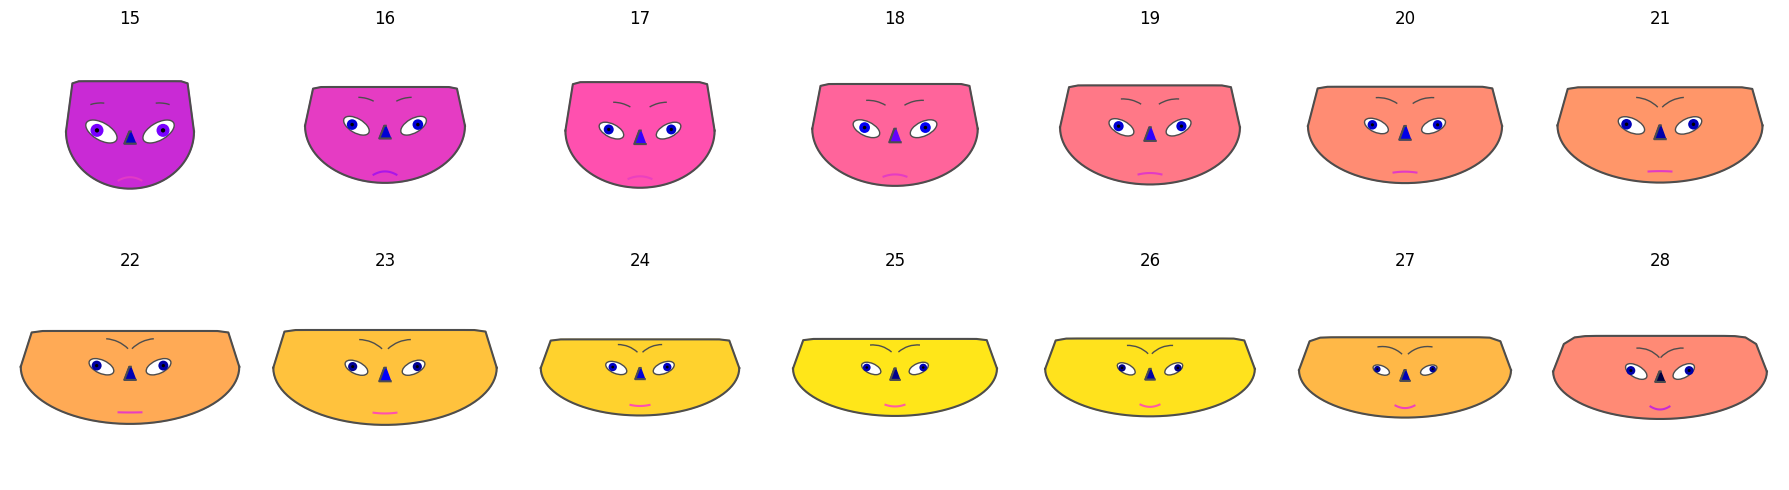

In [ ]:
fig = chernoff_face(data=df_age,
                    n_columns=7,
                    long_face=False,
                    titles=['15','16','17','18','19','20','21','22','23','24','25','26','27','28'],
                    color_mapper=matplotlib.cm.gnuplot2,
                    figsize=(18, 5), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

In [ ]:
df_race = df.groupby(['race']).mean().reset_index()

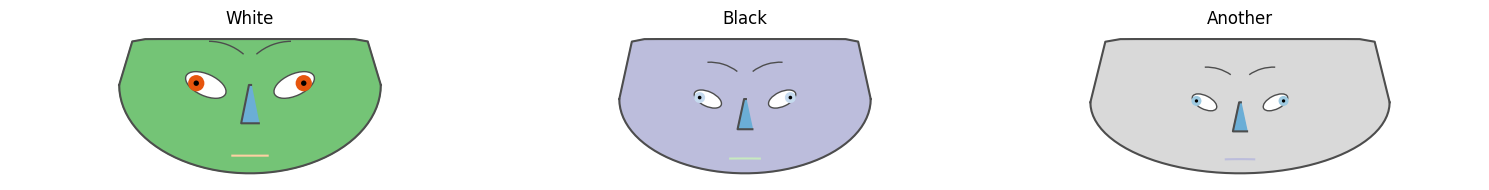

In [ ]:
fig = chernoff_face(data=df_race,
                    n_columns=3,
                    long_face=False,
                    titles=["White", "Black", "Another"],
                    color_mapper=matplotlib.cm.tab20c,figsize=(15, 2), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

Очевидно, белые матери имеют значимые различия по сравнению с матерями других рас.

In [ ]:
df_yschool = df.groupby(['yschool']).mean().reset_index()

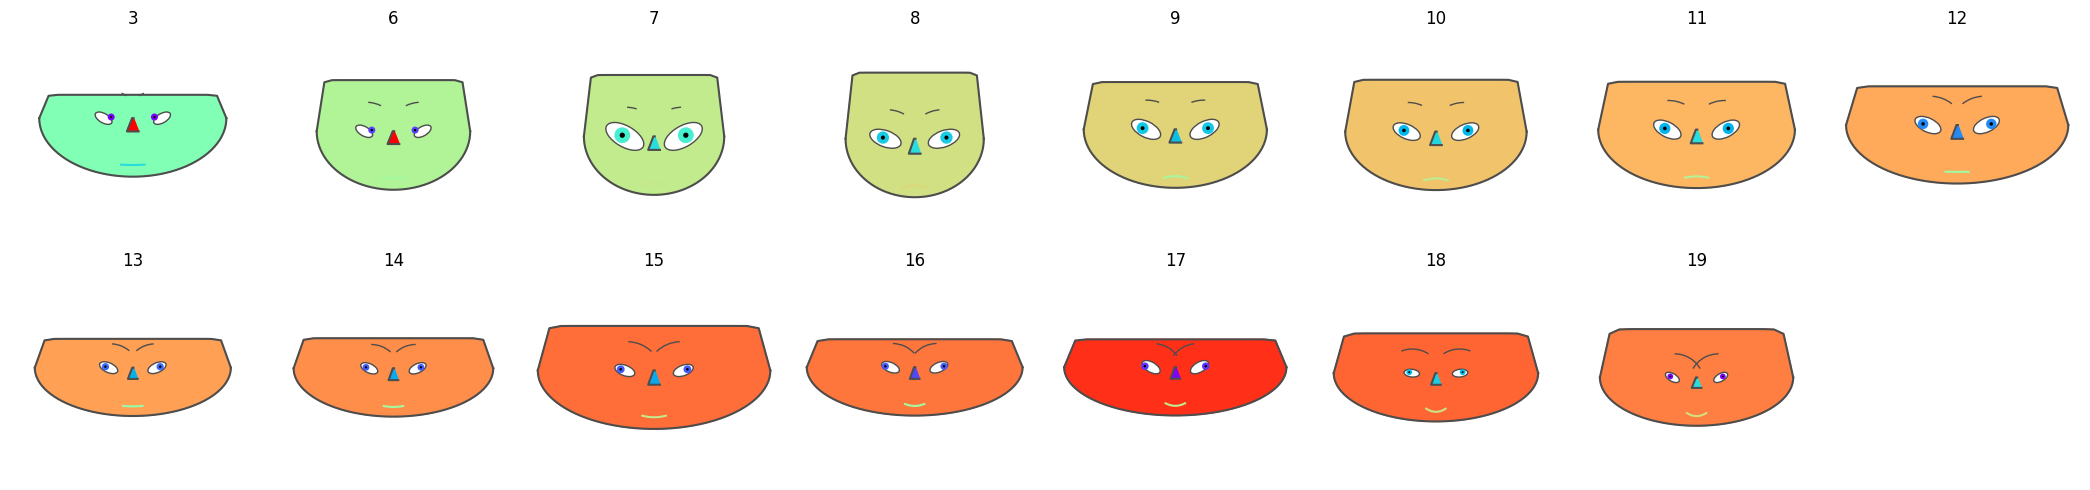

In [ ]:
fig = chernoff_face(data=df_yschool,
                    n_columns=8,
                    long_face=False,
                    titles=['3','6','7','8','9','10','11','12','13','14','15','16','17','18','19'],
                    color_mapper=matplotlib.cm.rainbow,
                    figsize=(21, 5), dpi=100)
fig.tight_layout()
matplotlib.pyplot.show()

## 2. RadViz

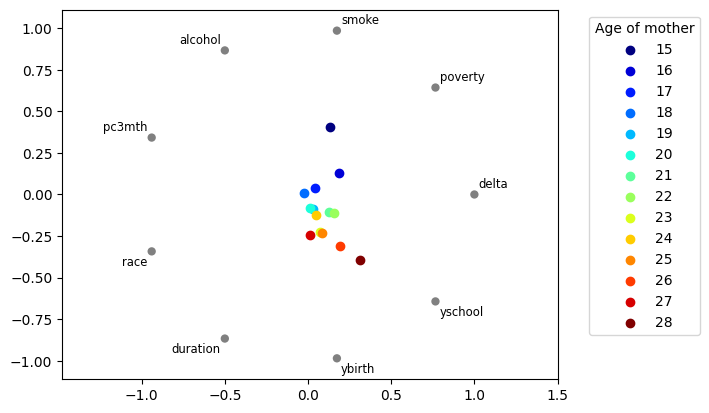

In [ ]:
pd.plotting.radviz(df_age,'agemth', colormap=matplotlib.cm.jet).legend(loc='upper right', title='Age of mother', bbox_to_anchor=(1.3, 1),
                                                                         labels=['15','16','17','18','19','20','21','22','23','24','25','26','27','28'])

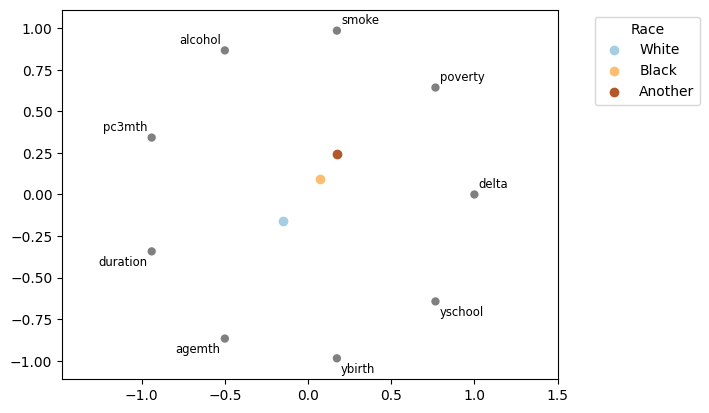

In [ ]:
pd.plotting.radviz(df_race,'race', colormap=matplotlib.cm.Paired).legend(loc='upper right', title='Race', bbox_to_anchor=(1.3, 1),
                                                                         labels=['White','Black','Another'])

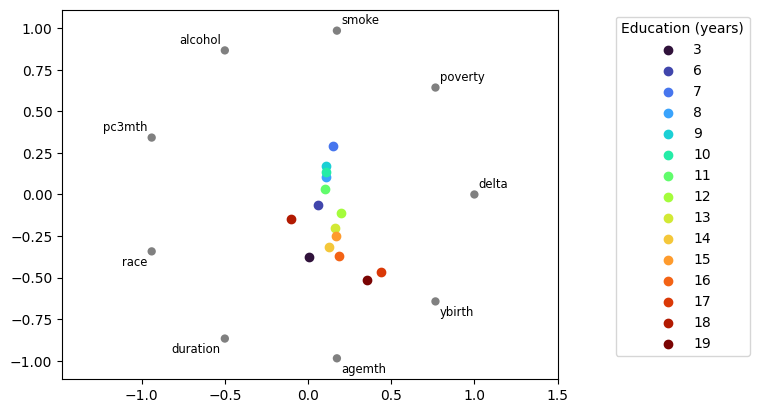

In [ ]:
pd.plotting.radviz(df_yschool,'yschool', colormap=matplotlib.cm.turbo).legend(loc='upper right', title='Education (years)', bbox_to_anchor=(1.4, 1),
                                                                              labels=['3','6','7','8','9','10','11','12','13','14','15','16','17','18','19'])

По этому графику можем заметить зависимость возраста матери и ее уровня образования.

## 3. Кривые Эндрюса

In [ ]:
data_race_sort = data.sort_values(by=['race'])
data_race_sort = data_race_sort.drop(['Unnamed: 0','race'], axis='columns')

arr = np.array(data_race_sort)

In [ ]:
def andrews_curve(x,theta):
  curve = list()
  for th in theta:
    x1 = x[0] / np.sqrt(2)
    x2 = x[1] * np.sin(th)
    x3 = x[2] * np.cos(th)
    x4 = x[3] * np.sin(2.*th)
    curve.append(x1+x2+x3+x4)
  return curve

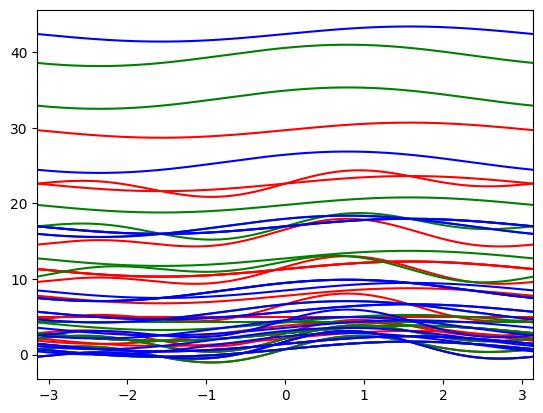

In [ ]:
accuracy = 1000
samples = arr
theta = np.linspace(-np.pi, np.pi, accuracy)

for s in samples[:20]: # White
  pl.plot(theta, andrews_curve(s, theta), 'r')

for s in samples[700:720]: # Black
  pl.plot(theta, andrews_curve(s ,theta), 'g')

for s in samples[900:920]: # Another
  pl.plot(theta, andrews_curve(s, theta), 'b')

pl.xlim(-np.pi,np.pi)
pl.show()

In [111]:
data_yschool_sort = data.sort_values(by=['yschool'])
data_yschool_sort = data_yschool_sort.drop(['Unnamed: 0','yschool'], axis='columns')

arr2 = np.array(data_yschool_sort)

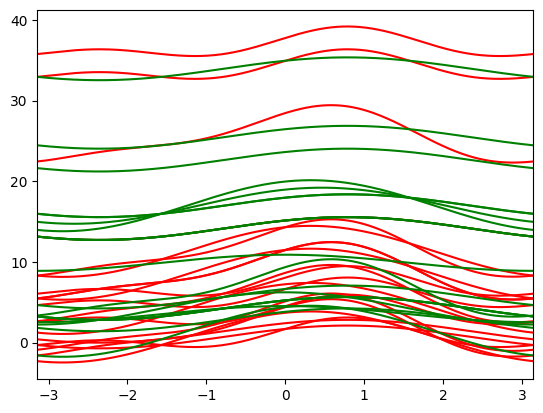

In [113]:
accuracy = 1000
samples = arr2
theta = np.linspace(-np.pi, np.pi, accuracy)

for s in samples[:20]: # Наименее образованные
  pl.plot(theta, andrews_curve(s, theta), 'r')

for s in samples[906:926]: # Наиболее  образованные
  pl.plot(theta, andrews_curve(s ,theta), 'g')

pl.xlim(-np.pi,np.pi)
pl.show()

**Выводы:** Знакомство с альтернативными инстументами визуализации позволило по-новому посмотреть на многомерные данные, но какие-то новые полезные выводы получить не удалось.